<a name="top" id="top"></a>

<div align="center">
    <h1>CHE597 - Linear Regression </h1>
    <a href="https://github.com/bernalde">David E. Bernal Neira</a>
    <br>
    <i>Davidson School of Chemical Engineering, Purdue University</i>
    <br>
    <a href="https://colab.research.google.com/github/SECQUOIA/PU_CHE597_S2025/blob/main/8-Linear_Regression/Linear_Regression.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://secquoia.github.io/">
        <img src="https://img.shields.io/badge/🌲⚛️🌐-SECQUOIA-blue" alt="SECQUOIA"/>
    </a>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Dataset-Generation" data-toc-modified-id="Dataset-Generation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset Generation</a></span></li><li><span><a href="#Linear-Regression---Theory" data-toc-modified-id="Linear-Regression---Theory-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Linear Regression - Theory</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Least-Squares-Regression" data-toc-modified-id="Least-Squares-Regression-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Least-Squares Regression</a></span></li><li><span><a href="#Scikit-learn" data-toc-modified-id="Scikit-learn-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Scikit learn</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Regularization</a></span><ul class="toc-item"><li><span><a href="#Lasso-Regularization" data-toc-modified-id="Lasso-Regularization-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Lasso Regularization</a></span></li></ul></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Ridge Regression</a></span><ul class="toc-item"><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Elastic Net</a></span></li></ul></li><li><span><a href="#Dimension-Reduction" data-toc-modified-id="Dimension-Reduction-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Dimension Reduction</a></span></li><li><span><a href="#Dow-Dataset" data-toc-modified-id="Dow-Dataset-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Dow Dataset</a></span><ul class="toc-item"><li><span><a href="#Least-Squares-Regression" data-toc-modified-id="Least-Squares-Regression-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Least-Squares Regression</a></span></li><li><span><a href="#Ridge-Regression-(L2-regularization)" data-toc-modified-id="Ridge-Regression-(L2-regularization)-1.9.2"><span class="toc-item-num">1.9.2&nbsp;&nbsp;</span>Ridge Regression (L2 regularization)</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-1.9.3"><span class="toc-item-num">1.9.3&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Partial-Least-Squares" data-toc-modified-id="Partial-Least-Squares-1.9.4"><span class="toc-item-num">1.9.4&nbsp;&nbsp;</span>Partial Least Squares</a></span></li></ul></li></ul></li></ul></div>

<b>If you are using google colab you should save this notebook and any associated textfiles to their own folder on your google drive. Then you will need to adapt the following commands so that the notebook runs from the location of that folder.</b>


In [1]:
# If using this on Google colab, we need to install the packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

    # Colab command to navigate to the folder holding the homework,
    # CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
    # Note: if there are spaces in the path, you need to preceed them with a backslash '\'
    %cd /content/drive/My\ Drive/CHE597/Lectures/7-Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression

### Dataset Generation
To illustrate the various linear regression models in this notebook, we will generate a model dataset where we know the generating function, and which has more x variables than we need. 

Text(0, 0.5, 'Y')

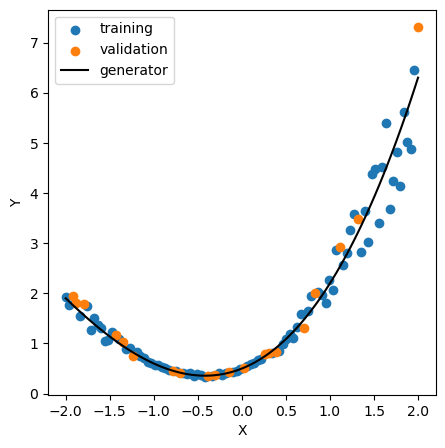

In [3]:
import random
random.seed(8195)
np.random.seed(8195) # for reproducibility

# Define generating function
x = np.linspace(-2,2.0,100)
Y = 0.7*x + 0.9*x**(2.0) +0.1*x**(3.0)
Y = Y*0.5*(np.random.rand(len(Y))-0.5) + Y + 0.5

# Make matrix of X features
X = np.ones([len(Y),31])
for i in range(10):
  for j in range(1,4):
    X[:,i*3+j] = x**(j) + (np.random.rand(len(Y))-0.5)*0.01

# Make training and validation sets
inds = list(range(len(Y)))
random.shuffle(inds)
t_inds = inds[:80]
v_inds = inds[-20:]
y_train = Y[t_inds]
y_val   = Y[v_inds]
x_train = X[t_inds]
x_val   = X[v_inds]

# Plot time vs impurity
plt.figure(figsize=(5,5))
plt.scatter(x[t_inds],y_train,marker='o',label="training")
plt.scatter(x[v_inds],y_val,marker='o',label="validation")
plt.plot(x,0.7*x + 0.9*x**(2.0) +0.1*x**(3.0)+0.5,color='k',label='generator')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

The generating function is only 3 dimensional (i.e., proportional to $x$,$x^2$, and $x^3$) with a constant offset, but we've artificially supplied an additional 27 variables that are strongly correlated with the generating x variables. The data is split between training and validation data in an 80:20 split.

Having extra variables is a common problem in building models and will be our entry point to adding sophistication to the ordinary least-squares linear regression that you are used to.

### Linear Regression - Theory
In basic linear regression modeling we attempt to built a model of the form
$$ \mathbf{y} = \mathbf{x}\mathbf{\beta} + \mathbf{\varepsilon} $$
where $\mathbf{y}$ are the values we want to predict, $\mathbf{x}$ are the values of the variables we want to base our predictions on, $\mathbf{\varepsilon}$ are the residuals between the predicted value and the real value, and $\mathbf{\beta}$ is a vector of constants to be determined such that the residuals are minimized. All of these quantities are vectors or matrices. $\mathbf{y}$ is an $N_s$ by $1$ vector, where $N_s$ is the number of samples. $\mathbf{x}$ is an $N_s$ by $N_x + 1$ matrix, where $N_x$ is the number of predictor variables with an extra column of $1$s used to define an optional intercept term. $\mathbf{\beta}$ is an $N_x$ by $1$ vector, and $\mathbf{\varepsilon}$ is an $N_s$ by $1$ vector holding the differences between the predicted values for each sample ($\mathbf{x}_i\cdot\beta$). 

The least squares solution corresponds to selecting $\mathbf{\beta}$ such that the square of the residuals is minimized:

$$\underset{\beta}{\mathrm{arg \, min}}\sum_{i}\left(y_{i} - \mathbf{x}_{i}\mathbf{\beta}\right)^2 $$

This can be solved by taking the derivative and solving for the extremum. Or more concisely:

$$ \mathbf{x}\mathbf{\beta} = \mathbf{y} $$
$$  \mathbf{\beta} = \left(\mathbf{x}^\mathrm{T}\mathbf{x}\right)^{-1}\mathbf{x}^\mathbf{T}\mathbf{y} $$

Where the second line follows by multiplying each side by $\mathbf{x}^\mathrm{T}$ then taking the inverse. This deals with rank deficiency for tall matrices (i.e., when there are more samples than variables and the system of equations is inconsistent).

<b>Note: the above description also generalizes to $\mathbf{y}$ containing multiple variables, but the $\mathbf{\beta}$ and $\mathbf{y}$ matrices would change shape.</b>   

### Metrics
When evaluating the quality of models we will typically consider the <b>mean squared error (MSE)</b>:

$$ \mathrm{MSE} = \frac{1}{N}\sum_{i}^{N}\left(y_i - y_{i,p}\right)^2, $$

where $y_{i,p}$ is the predicted value by the model for the sample $i$, and the <b>coefficient of determination </b>($R^2$):

$$ R^2 = 1 - \frac{\sum_i^N\left(y_i - y_{i,p}\right)^2}{\sum_i^N\left(y_i - \mu_y\right)^2} $$

where $\mu_y$ is the mean of the predicted variable, $y$. The MSE is straightforwardly related to the average error. The denominator of $R^2$ value is proportional to the variance of the predictor variable and the numerator is proportional to the average squared error in the prediction, this ratio can loosely be interpreted as the fraction of unexplained variance (i.e., squared errors observed normalized by variance of data). $R^2$ is bounded by 1 above but unbounded below. A model that always predicts the mean (i.e. $y_{i,p}=\mu_y$) would have $R^2=0$.

<b>Residual plots</b> of $y_{i} - y_{i,p}$ are also an important tool for understanding the quality of the fit and the presence of systematic bias. The residual is typically plotted against $y_{i,p}$, a specific $x_i$, or time (for time-series data) on the x-axis.

<b>Component plots</b> of $\beta_i$ are useful for determining which x variables the model finds to be informative for predicting y. Similarly, $\beta_i\cdot\mu_i$ is also useful since the x variables may have different units. These are usually presented as bar charts.

### Least-Squares Regression
For our problem, we naively applying least-squares regression is a bad idea, because we have so many variables. Nevertheless, there is no harm in trying:

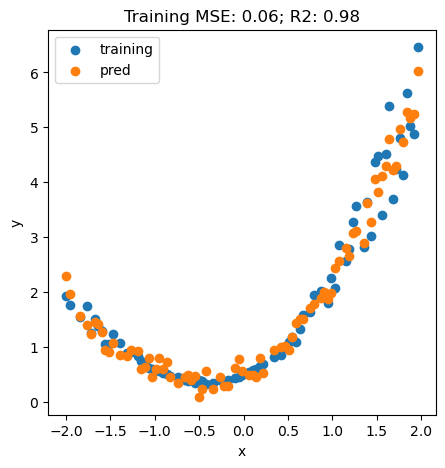

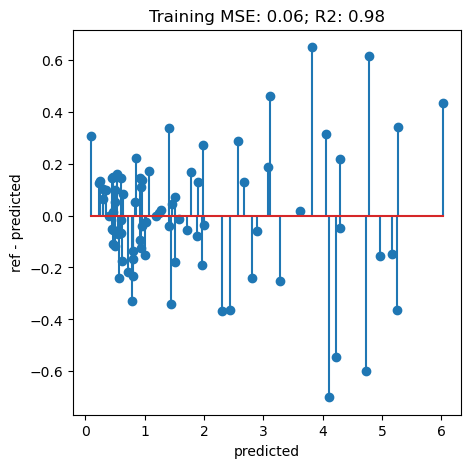

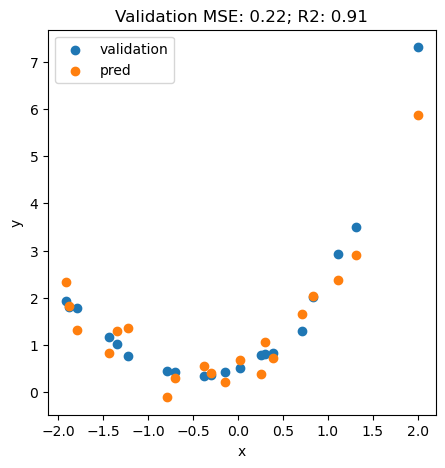

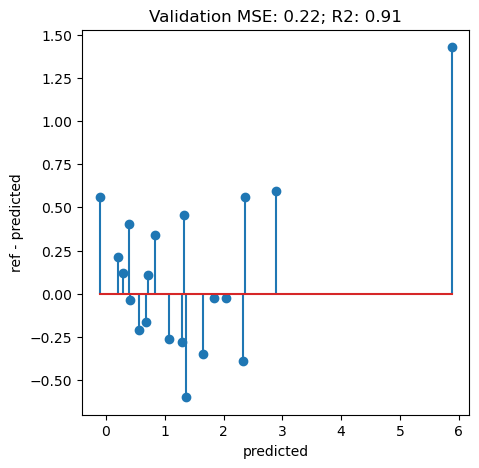

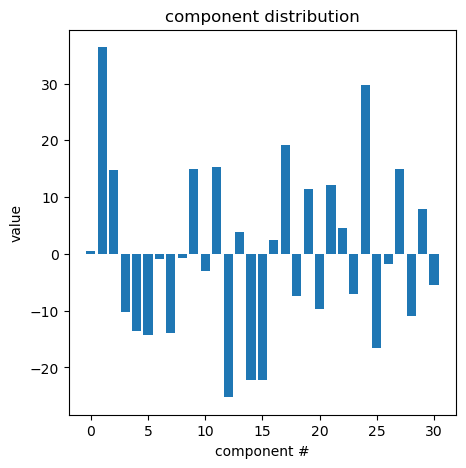

In [4]:
# fit the ordinary least squares model
beta = np.linalg.solve(np.dot(x_train.T,x_train),np.dot(x_train.T,y_train))

# Make predictions on training data
p_train = np.dot(x_train,beta)
p_val = np.dot(x_val,beta)

# Plot x vs y (training)
plt.figure(figsize=(5,5))
plt.scatter(x_train[:,1],y_train,marker='o',label="training")
plt.scatter(x_train[:,1],p_train,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
mse = np.mean((p_train - y_train)**(2.0))
r2  = 1 - mse/np.mean((y_train-np.mean(y_train))**(2.0))
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_train,y_train-p_train)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot x vs y (validation)
plt.figure(figsize=(5,5))
plt.scatter(x_val[:,1],y_val,marker='o',label="validation")
plt.scatter(x_val[:,1],p_val,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
mse = np.mean((p_val - y_val)**(2.0))
r2  = 1 - mse/np.mean((y_val-np.mean(y_val))**(2.0))
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# residual plot (validation)
plt.figure(figsize=(5,5))
plt.stem(p_val,y_val-p_val)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot component distribution
plt.figure(figsize=(5,5))
plt.bar(range(len(beta)),beta)
plt.xlabel("component #")
plt.ylabel("value")
plt.title("component distribution")
plt.show()

There are several illustrative features of this example. First, looking at the predicted values, we don't get the smooth generating function but instead something that looks noisy. Clearly, the model has tried to fit the noise rather than just the signal. Second, there is a large difference between the training and validation MSE and R2 values. This is a telltale sign of overfitting. Third, when we look at the components of the $\beta$ vector, we can see many of large values. Since least squares optimization just focuses on minimizing the training error, it makes full use of whatever complexity the model allows. In this case, the result is a large number of components that roughly balance one another and enable the model to overfit the noise (recall: the true generating function only has four non-zero values). 

### Scikit learn
For the rest of our models we will utilize the scikit learn (skl) package, which is an open-source library of non-deep learning ML models. 

We'll use skl often throughout this course. Here, we'll be using it to illustrate some regression techniques that have a modicum of sophistication beyond the least-squares analysis presented above. But first, let's illustrate how to use skl in the context of linear regression (a problem I've already showed you how to implement yourself above). 

The basic syntax of sklearn is to call the constructor of the model you want to fit (just with the relevant parameters specified, no data). After you have initialized an instance of the model, you will train it using the `.fit(data)` method, and access various quantities associated with the model using other methods. Let's illustrate using least-squares regression: 

In [5]:
from sklearn import linear_model # contains all of the linear regression models
from sklearn.metrics import mean_squared_error, r2_score # error metrics
lin = linear_model.LinearRegression(fit_intercept=False) # call the constructor
lin.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

Note, since our x_train matrix contains an explicit offset column we don't need to fit the intercept in the model (`fit_intercept=False`).

Now that we've trained the model, we can grab the model coefficients from it, or use the `.predict()` method to make predictions on new x values:

In [6]:
# scikit learn results
print("model coefficients: {}".format(lin.coef_))
print("method result: {}".format(lin.predict(x_train)))
print("mse: {}".format(mean_squared_error(y_train,lin.predict(x_train))))
print("r2: {}".format(r2_score(y_train,lin.predict(x_train))))

model coefficients: [  0.49531081  36.38973773  14.69506632 -10.21589105 -13.58454879
 -14.29221668  -0.84021763 -13.9490803   -0.76583662  14.87508431
  -2.96004945  15.21357345 -25.25295625   3.76327538 -22.19473498
 -22.24080243   2.50432608  19.14516101  -7.47261728  11.3973766
  -9.79588344  12.09036898   4.61760666  -7.11729831  29.66108455
 -16.55296718  -1.87374275  14.93094788 -10.90751065   7.87068372
  -5.47537332]
method result: [0.94277193 4.28885776 0.4972985  0.79811444 0.4070089  4.96605572
 1.57035283 2.43399282 0.52682659 5.16480119 0.80056529 0.24413155
 0.86108685 0.72378888 0.5583004  2.57165189 1.24915914 4.77964868
 1.44244955 1.18811122 1.51704823 0.49370974 5.27702501 0.35156858
 3.82181328 1.89248371 0.46450077 0.78352753 1.46233147 0.91960904
 2.8048535  0.0897782  0.95208017 2.29908178 4.73200546 0.2987155
 0.23114767 0.50079601 1.00160999 1.5194129  5.25045156 0.45449095
 1.06764378 3.11593684 3.08335449 1.27680904 0.60440865 0.63494416
 1.02205238 1.417801

Let's also compare the scikit learn least-squares model with the one we obtained previously:

In [7]:
# Linear Algebraic Analytic Solution
beta = np.linalg.solve(np.dot(x_train.T,x_train),np.dot(x_train.T,y_train))
print("model coefficients: {}".format(beta))
print("longform result: {}".format(np.dot(x_train,beta)))
print("mse: {}".format(np.mean((y_train-np.dot(x_train,beta))**(2.0))))
print("r2: {}".format(1 - np.mean((y_train-lin.predict(x_train))**(2.0))/np.mean((y_train-np.mean(y_train))**(2.0))))

model coefficients: [  0.49531081  36.38973775  14.69506633 -10.21589097 -13.58454878
 -14.29221666  -0.84021762 -13.94908029  -0.76583664  14.87508425
  -2.96004946  15.21357346 -25.25295626   3.76327541 -22.19473498
 -22.24080243   2.50432609  19.14516099  -7.47261729  11.39737658
  -9.79588346  12.09036898   4.61760666  -7.1172983   29.66108454
 -16.55296721  -1.87374273  14.93094788 -10.90751065   7.87068372
  -5.47537332]
longform result: [0.94277193 4.28885776 0.4972985  0.79811444 0.4070089  4.96605572
 1.57035283 2.43399282 0.52682659 5.16480119 0.80056529 0.24413155
 0.86108685 0.72378888 0.5583004  2.57165189 1.24915914 4.77964868
 1.44244955 1.18811122 1.51704823 0.49370974 5.27702501 0.35156858
 3.82181328 1.89248371 0.46450077 0.78352753 1.46233147 0.91960904
 2.8048535  0.0897782  0.95208017 2.29908178 4.73200546 0.2987155
 0.23114767 0.50079601 1.00160999 1.5194129  5.25045156 0.45449095
 1.06764378 3.11593684 3.08335449 1.27680904 0.60440865 0.63494416
 1.02205238 1.417

Again, they are identical. Scikit learn is consistent with our analytic results. For the rest of the notebook we will lean on scikit learn rather than implementing our own methods from scratch. 

### Regularization
Regularization is the concept of reducing model complexity to reduce overfitting. Among the simplest approaches to semi-automatically simplifying models is through penalization of the L1 and/or L2 norm in the objective function:

$$\underset{\beta}{\mathrm{arg \, min}}\frac{1}{N}\sum_{i}\left(y_{i} - \mathbf{x}_{i}\mathbf{\beta}\right)^2 + \alpha||\beta||_{p} $$

where $\alpha$ is an adjustable parameter and $||\beta||_{p} = \left(\sum_j^{N_\beta} |\beta_j|^p \right)^{\frac{1}{p}} $ is the $L_p$-norm, with p=1 for L1 regularization and p=2 for L2 regularization (also known as Lasso and Ridge regularization, respectively). For L1 regularization, an additional division by $N_\beta$ is typically made in the objective function. 

From a mechanistic perspective L1 and L2 penalize large coefficient vectors in models. Theoretical justifications can be made for these regularizations, but they are more commonly employed as a heuristic, with the value of $\alpha$ being determined by performance on validation data. All else being equal, L1 tends to more aggresively zero out parameters, whereas L2 favors small but relatively more distributed values. Analytic solutions exist for Linear Lasso regression and linear Ridge regression, but we won't implement them ourselves. Instead we'll use the implementations provided by scikit learn.

<b>Note:</b> The effect of regularization on each <b>x</b> variable will depend on its units and variance. For example, consider variables representing identical data but in different units. The difference in units will affect the coresponding $\beta$ and the response of that variable to the regularization penalty. It is common to normalize <b>x</b> variables by their variance (i.e., convert them into z-scores) to avoid this. Normalization doesn't guarrantee a better result, though, and scikit learn doesn't do it by default. 

#### Lasso Regularization
The relevant scikit learn model is `Lasso` and it accepts the hyperparameter `alpha` as an argument. Since we don't know what value of `alpha` to choose <i>a priori</i> we will use performance on the validation data to help us choose the best value (`LassoCV` is a related class that performs cross-validation when you aren't using a dedicated validation dataset). 

/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.513e+00, tolerance: 4.431e-01
  model = cd_fast.enet_coordinate_descent(
/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.477e+00, tolerance: 4.431e-01
  model = cd_fast.enet_coordinate_descent(
/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

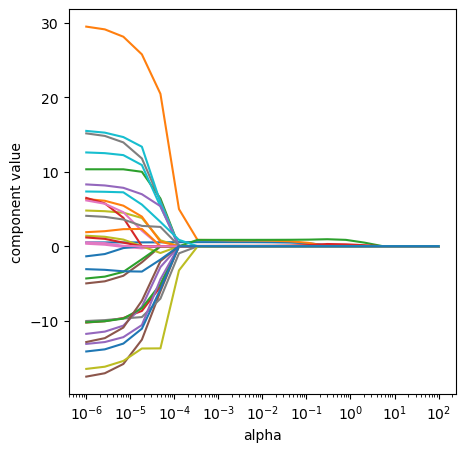

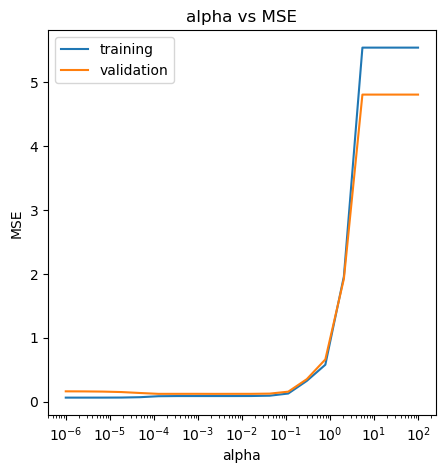

In [8]:
# Do a hyperparameter optimization on alpha
alphas = np.logspace(-6,2,20)
betas  = []
t_mses = []
v_mses = []
for i in alphas:
  lin = linear_model.Lasso(alpha=i,max_iter=1000000,tol=0.001,fit_intercept=False) # You may need to adjust tol but it gets expensive
  lin.fit(x_train,y_train)
  betas  += [lin.coef_]
  t_mses += [mean_squared_error(y_train,lin.predict(x_train))]
  v_mses += [mean_squared_error(y_val,lin.predict(x_val))]

# Plot components vs alpha
plt.figure(figsize=(5,5))
for i in range(len(betas[0])):
  plt.plot(alphas,[ _[i] for _ in betas ])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("component value")

# Plot mse on training vs mse on validation
plt.figure(figsize=(5,5))
plt.plot(alphas,t_mses,label="training")
plt.plot(alphas,v_mses,label="validation")
plt.xscale('log')
plt.title("alpha vs MSE")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.legend()
plt.show()

Since we didn't know the value of $\alpha$ we have performed a hyperparameter search utilizing our validation data. The lasso optimization function can exhibit numerical instability which sometimes requires large `n_iterations` values (you probably still saw some convergence warnings when executing the above cell). 

The plot of $\alpha$ versus the component values shows how the solution gradually evolves from the previous least squares result (obtained for $\alpha = 0$) to the null solution ($\alpha >> MSE$) when the regularization term dominates the error term in the objective function. From the plot of $\alpha$ vs MSE we can see at intermediate values (i.e., $\alpha\approx0.01$) the validation MSE reaches a minimum. 

Let's see what the predicted values look like with the model resulting from the best $\alpha$

best alpha: 0.002335721469090121


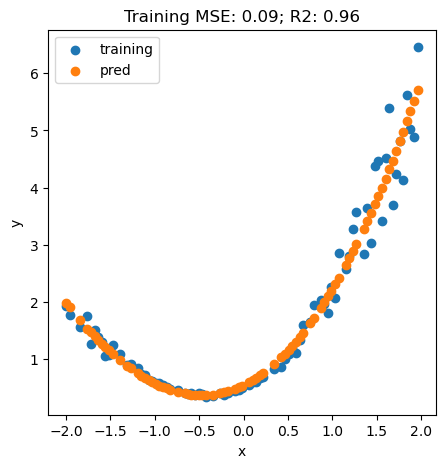

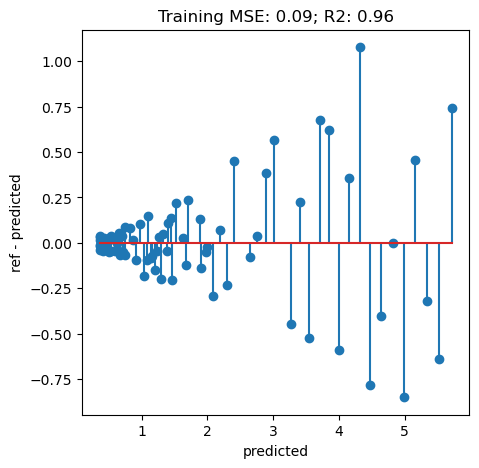

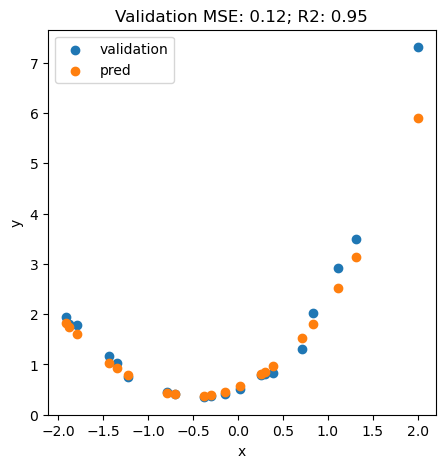

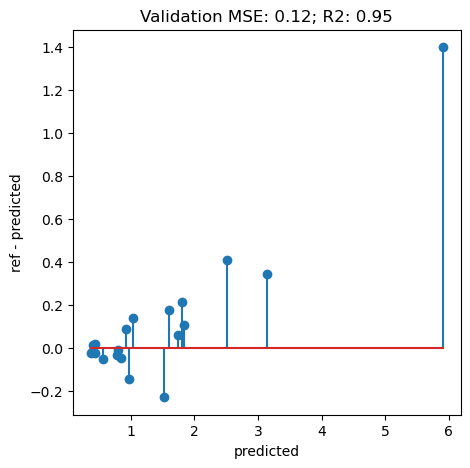

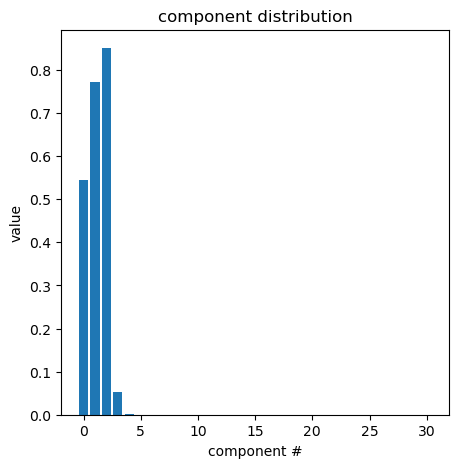

In [9]:
print("best alpha: {}".format(alphas[np.argmin(v_mses)]))
# Plot the result using the best alpha
lin = linear_model.Lasso(alpha=alphas[np.argmin(v_mses)],max_iter=1000000,tol=0.001,fit_intercept=False)
lin.fit(x_train,y_train)
p_train = lin.predict(x_train)
p_val = lin.predict(x_val)

# Plot x vs y (training)
plt.figure(figsize=(5,5))
plt.scatter(x_train[:,1],y_train,marker='o',label="training")
plt.scatter(x_train[:,1],p_train,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_train,p_train)
r2  = r2_score(y_train,p_train)
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))
plt.legend()

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_train,y_train-p_train)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot x vs y (validation)
plt.figure(figsize=(5,5))
plt.scatter(x_val[:,1],y_val,marker='o',label="validation")
plt.scatter(x_val[:,1],p_val,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_val,p_val)
r2  = r2_score(y_val,p_val)
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))
plt.legend()

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_val,y_val-p_val)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot component distribution
plt.figure(figsize=(5,5))
plt.bar(range(len(lin.coef_)),lin.coef_)
plt.xlabel("component #")
plt.ylabel("value")
plt.title("component distribution")
plt.show()

Investigating the prediction curves, we can see that lasso regression has returned a smooth curve very similar to the generating function. Likewise, the training and validation predictions show similar R2 and MSE values and it has suppressed the occurence of large components in the $\beta$ vector. In particular, lasso has zeroed out most of the potential parameters and the predicted components are very similar to the generating function (0.5,0.7,0.9,0.1).

### Ridge Regression
The relevant scikit learn model for ridge regression is `Ridge` and it accepts a parameter `alpha`. We'll go through an identical analysis to what we just did for lasso regularization and compare the results:

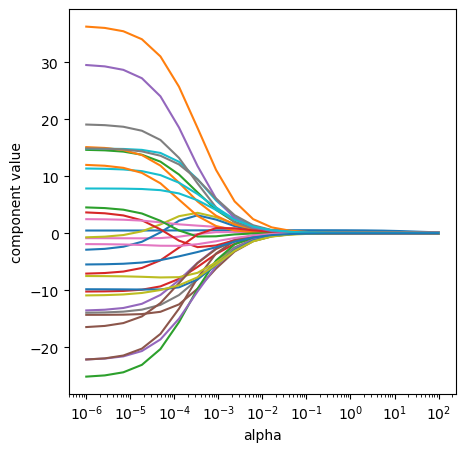

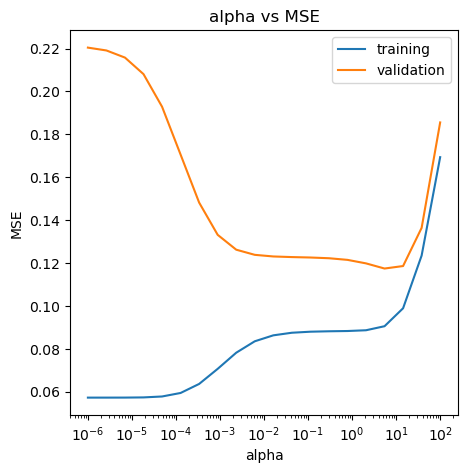

In [10]:
# Do a hyperparameter optimization on alpha
alphas = np.logspace(-6,2,20)
betas  = []
t_mses = []
v_mses = []
for i in alphas:
  lin = linear_model.Ridge(alpha=i,max_iter=1000000,tol=0.001,fit_intercept=False)
  lin.fit(x_train,y_train)
  betas  += [lin.coef_]
  t_mses += [mean_squared_error(y_train,lin.predict(x_train))]
  v_mses += [mean_squared_error(y_val,lin.predict(x_val))]

# Plot components vs alpha
plt.figure(figsize=(5,5))
for i in range(len(betas[0])):
  plt.plot(alphas,[ _[i] for _ in betas ])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("component value")

# Plot mse on training vs mse on validation
plt.figure(figsize=(5,5))
plt.plot(alphas,t_mses,label="training")
plt.plot(alphas,v_mses,label="validation")
plt.xscale('log')
plt.title("alpha vs MSE")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.legend()
plt.show()

Ridge regression generally shows a smoother convergence compared with lasso, this is evident in both the component and mse versus alpha curves.  

best alpha: 5.455594781168514


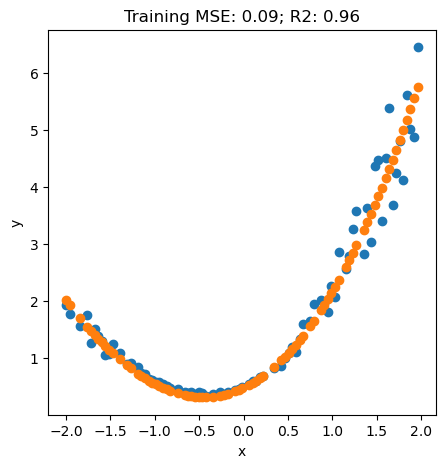

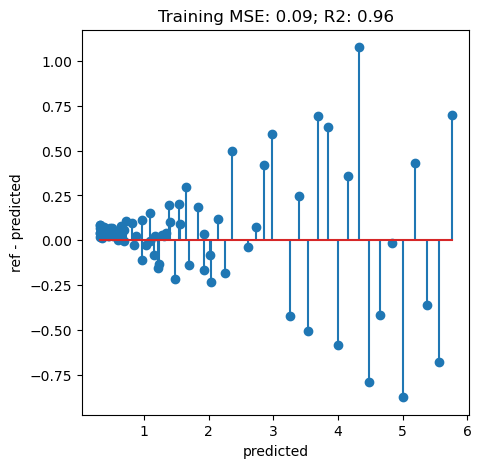

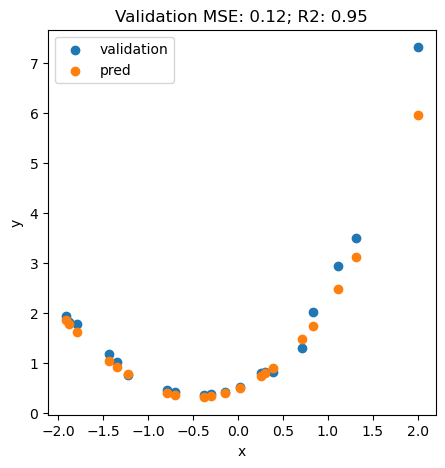

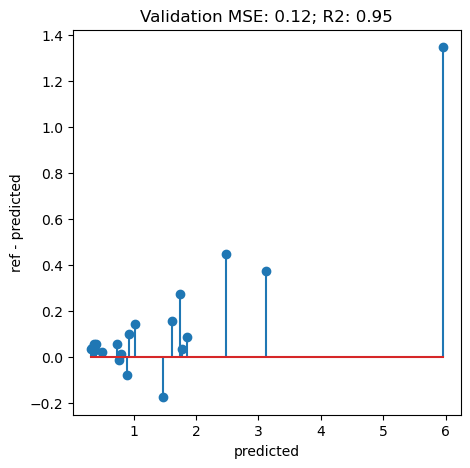

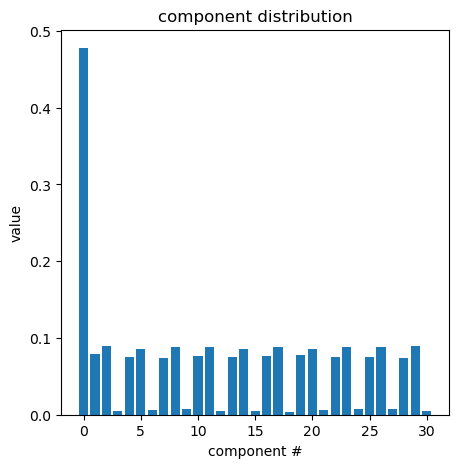

In [11]:
print("best alpha: {}".format(alphas[np.argmin(v_mses)]))
# Plot the result using the best alpha
lin = linear_model.Ridge(alpha=alphas[np.argmin(v_mses)],max_iter=1000000,tol=0.001,fit_intercept=False)
lin.fit(x_train,y_train)
p_train = lin.predict(x_train)
p_val = lin.predict(x_val)

# Plot x vs y (training)
plt.figure(figsize=(5,5))
plt.scatter(x_train[:,1],y_train,marker='o',label="training")
plt.scatter(x_train[:,1],p_train,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_train,p_train)
r2  = r2_score(y_train,p_train)
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_train,y_train-p_train)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot x vs y (validation)
plt.figure(figsize=(5,5))
plt.scatter(x_val[:,1],y_val,marker='o',label="validation")
plt.scatter(x_val[:,1],p_val,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_val,p_val)
r2  = r2_score(y_val,p_val)
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))
plt.legend()

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_val,y_val-p_val)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot component distribution
plt.figure(figsize=(5,5))
plt.bar(range(len(lin.coef_)),lin.coef_)
plt.xlabel("component #")
plt.ylabel("value")
plt.title("component distribution")
plt.show()

Investigating the prediction curves, we can see that ridge regression has returned a smooth function very similar to the generating function. Likewise, the training and validation predictions show similar R2 and MSE values and it has suppressed the occurence of large components in the $\beta$ vector (note y-scale of component plot). In contrast to lasso, ridge doesn't generally zero out individual components. In the current case it recognizes which x variables are equivalent and distributes the necessary (small) amount of mixing evenly across each.

#### Elastic Net
It can be advantageous to combine the convergence behavior of ridge with the parsimony of lasso. Elastic net combines both L1 and L2 regularization terms in the objective function. In principle, you can set the weights of each term independently, although often the ratio is fixed and a single learning rate is used. The relevant scikit learn model is `ElasticNet` and it accepts a parameter `alpha`. We'll repeat the above analysis for elastic net. 

/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.585e+00, tolerance: 4.431e-01
  model = cd_fast.enet_coordinate_descent(
/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.640e+00, tolerance: 4.431e-01
  model = cd_fast.enet_coordinate_descent(
/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

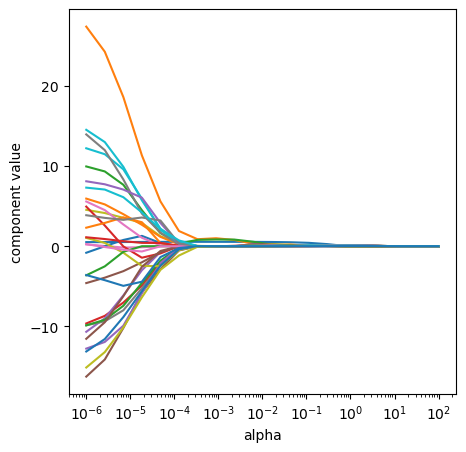

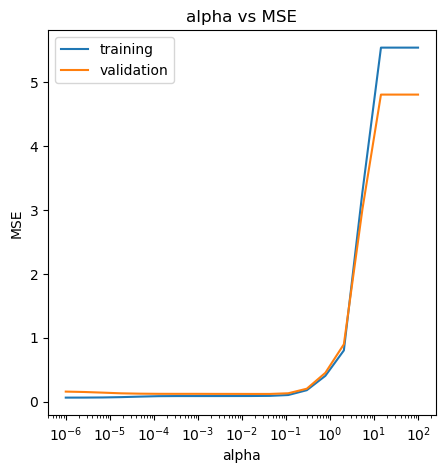

In [12]:
# Do a hyperparameter optimization on alpha
alphas = np.logspace(-6,2,20)
betas  = []
t_mses = []
v_mses = []
for i in alphas:
  lin = linear_model.ElasticNet(alpha=i,max_iter=1000000,tol=0.001,fit_intercept=False) # You may need to adjust tol
  lin.fit(x_train,y_train)
  betas  += [lin.coef_]
  t_mses += [mean_squared_error(y_train,lin.predict(x_train))]
  v_mses += [mean_squared_error(y_val,lin.predict(x_val))]

# Plot components vs alpha
plt.figure(figsize=(5,5))
for i in range(len(betas[0])):
  plt.plot(alphas,[ _[i] for _ in betas ])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("component value")

# Plot mse on training vs mse on validation
plt.figure(figsize=(5,5))
plt.plot(alphas,t_mses,label="training")
plt.plot(alphas,v_mses,label="validation")
plt.xscale('log')
plt.title("alpha vs MSE")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.legend()
plt.show()

best alpha: 0.04281332398719395


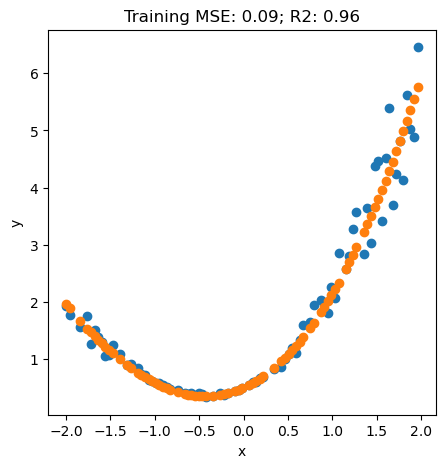

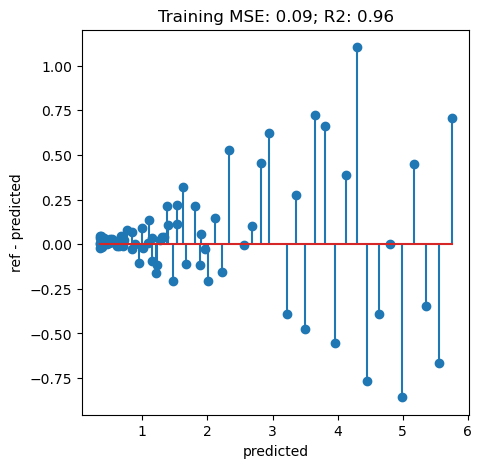

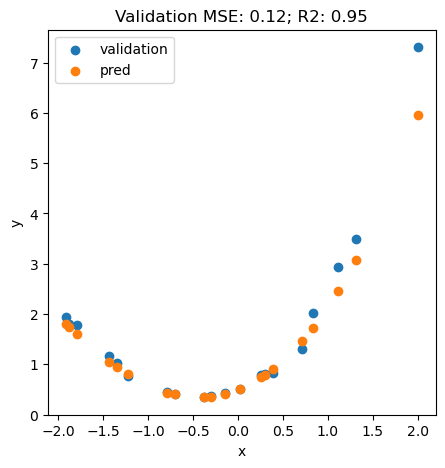

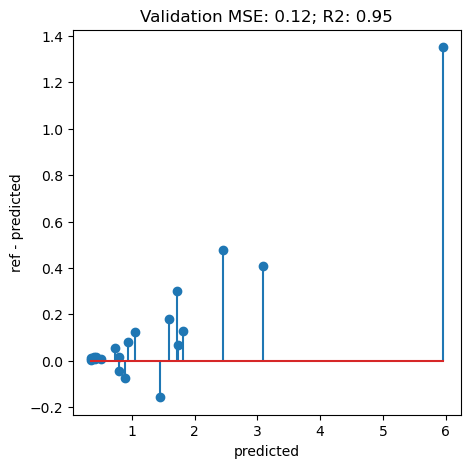

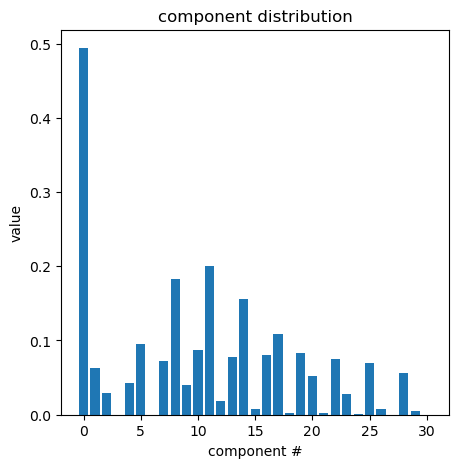

In [13]:
print("best alpha: {}".format(alphas[np.argmin(v_mses)]))
# Plot the result using the best alpha
lin = linear_model.ElasticNet(alpha=alphas[np.argmin(v_mses)],max_iter=1000000,tol=0.001,fit_intercept=False)
lin.fit(x_train,y_train)
p_train = lin.predict(x_train)
p_val = lin.predict(x_val)

# Plot x vs y (training)
plt.figure(figsize=(5,5))
plt.scatter(x_train[:,1],y_train,marker='o',label="training")
plt.scatter(x_train[:,1],p_train,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_train,p_train)
r2  = r2_score(y_train,p_train)
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_train,y_train-p_train)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot x vs y (validation)
plt.figure(figsize=(5,5))
plt.scatter(x_val[:,1],y_val,marker='o',label="validation")
plt.scatter(x_val[:,1],p_val,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_val,p_val)
r2  = r2_score(y_val,p_val)
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))
plt.legend()

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_val,y_val-p_val)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot component distribution
plt.figure(figsize=(5,5))
plt.bar(range(len(lin.coef_)),lin.coef_)
plt.xlabel("component #")
plt.ylabel("value")
plt.title("component distribution")
plt.show()

### Dimension Reduction
When we are dealing with more variables than is actually required for the model, our goal is often dimension reduction. Specifically, we are trying to find the most important combination of variables (i.e., directions in x-space)  according to some definition of importance that can be evaluated against the training data. This is the same task that motivated our use of PCA. In fact, there is such a thing as PCA regression, whereby models are incrementally constructed using the first n-PCs as the basis for regression. But we can do better. In particular, PCA only finds the directions that explain the variance in x-space without reference to the y-space. A related method called "partial least-squares" (PLS) finds the directions in x-space that best explain the variance in both x-space and y-space, this represents a more useful basis for building a model. 

We will use scikit learn's implementation of PLS within the cross decomposition module. The relevant model is `PLSRegression` and it accepts a parameter `n_components`. The number of components used in the regression is a hyperparameter, which like `alpha` in the regularization examples, can be chosen based on performance on the validation data. 

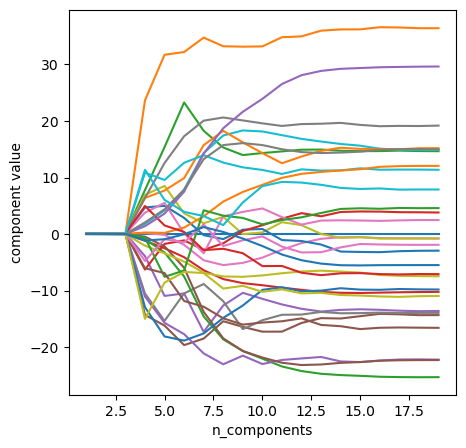

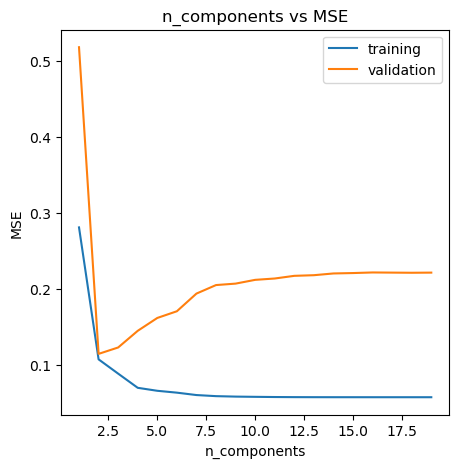

In [14]:
from sklearn.cross_decomposition import PLSRegression

# Do a hyperparameter optimization on n_components
n_comp = range(1,20)
betas  = []
t_mses = []
v_mses = []
for i in n_comp:
  lin = PLSRegression(n_components=i) # call the constructor
  lin.fit(x_train,y_train)
  betas  += [lin.coef_]
  t_mses += [mean_squared_error(y_train,lin.predict(x_train))]
  v_mses += [mean_squared_error(y_val,lin.predict(x_val))]

# Plot components vs alpha
plt.figure(figsize=(5,5))
for i in range(len(betas[0])):
  plt.plot(n_comp,[ _[i] for _ in betas ])
plt.xlabel("n_components")
plt.ylabel("component value")

# Plot mse on training vs mse on validation
plt.figure(figsize=(5,5))
plt.plot(n_comp,t_mses,label="training")
plt.plot(n_comp,v_mses,label="validation")
plt.title("n_components vs MSE")
plt.xlabel("n_components")
plt.ylabel("MSE")
plt.legend()
plt.show()

best n: 2


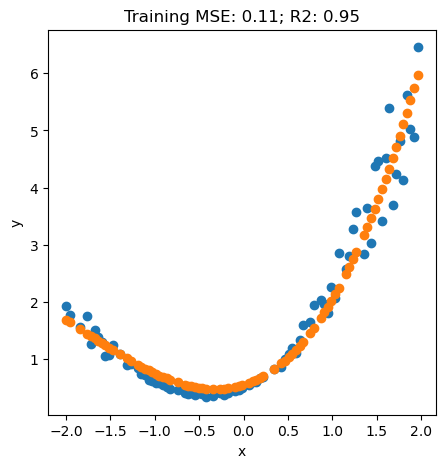

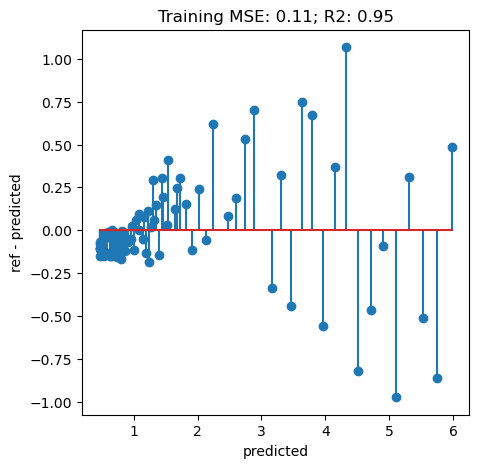

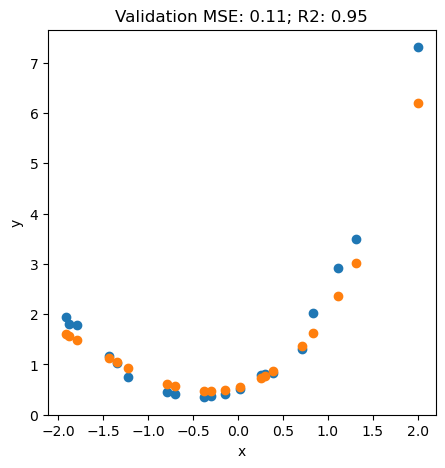

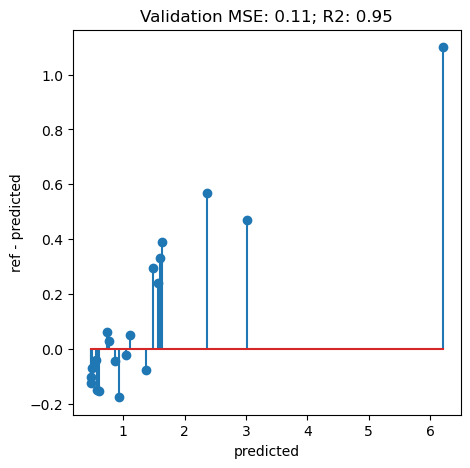

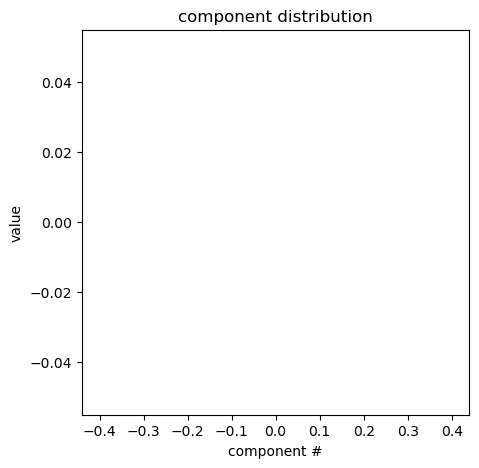

In [15]:
print("best n: {}".format(n_comp[np.argmin(v_mses)]))
# Plot the result using the best alpha
lin = PLSRegression(n_components=n_comp[np.argmin(v_mses)]) # call the constructor
lin.fit(x_train,y_train)
p_train = np.squeeze(lin.predict(x_train))
p_val = np.squeeze(lin.predict(x_val))

# Plot x vs y (training)
plt.figure(figsize=(5,5))
plt.scatter(x_train[:,1],y_train,marker='o',label="training")
plt.scatter(x_train[:,1],p_train,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_train,p_train)
r2  = r2_score(y_train,p_train)
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_train,y_train-p_train)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Training MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot x vs y (validation)
plt.figure(figsize=(5,5))
plt.scatter(x_val[:,1],y_val,marker='o',label="validation")
plt.scatter(x_val[:,1],p_val,marker='o',label="pred")
plt.xlabel("x")
plt.ylabel("y")
mse = mean_squared_error(y_val,p_val)
r2  = r2_score(y_val,p_val)
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# residual plot (training)
plt.figure(figsize=(5,5))
plt.stem(p_val,y_val-p_val)
plt.xlabel("predicted")
plt.ylabel("ref - predicted")
plt.title("Validation MSE: {:<4.2f}; R2: {:<4.2f}".format(mse,r2))

# Plot component distribution
plt.figure(figsize=(5,5))
plt.bar(range(len(lin.coef_[:,0])),lin.coef_[:,0])
plt.xlabel("component #")
plt.ylabel("value")
plt.title("component distribution")
plt.show()

Based on the validation data `n_components=2` is the best value for the hyperparameter. However, when we investigate the residual plots, we definitely see a missing `x^3` type component. Experiment with `n_components=3` to see this behavior corrected. Bad hyperparameters can often be the result of a insufficient/small validation dataset. 

For the `n_components=2` result you can see that the PLS analysis recognizes the equivalence between the various $x$, $x^2$, and $x^3$ variables. 

### Dow Dataset
We'll see how the previously described linear algorithms perform on the Dow dataset. For this we will utilize the cleaned data that we generated in the last notebook, along with some additional data for the same plant at a later date. This second dataset will serve as our validation data for evaluating how linear regression type models perform on unseen samples. Ultimately testing would require another dataset, or preserving a subset of what we have on hand prior to fitting the models. I've already cleaned the second data set for you so we can utilize it directly. 

First we'll load the data:

In [16]:
train = pd.read_excel("training_clean.xlsx")
val = pd.read_excel("validation_clean.xlsx")

# We will only focus on predicting impurity levels up to a threshold
# of 7, under the assumption that this would trigger intervention.
train = train[(train["y:Impurity"]>0) & (train["y:Impurity"]<7) ]
val = val[(val["y:Impurity"]>0) & (val["y:Impurity"]<7)]

# We'll also include the variables related to the input feed and outlet impurity
# as training variables. The outlet impurity is distinct from the y:impurity variable
# which is an independent assessment of impurity.
xcols = list(val.columns[1:43]) + list(val.columns[-2:])

# Define the training and validation X and Y arrays
train_X = train.loc[:,xcols].to_numpy()
train_Y = train.iloc[:,-3].to_numpy()
val_X  = val.loc[:,xcols].to_numpy()
val_Y  = val.iloc[:,-3].to_numpy()

#### Least-Squares Regression

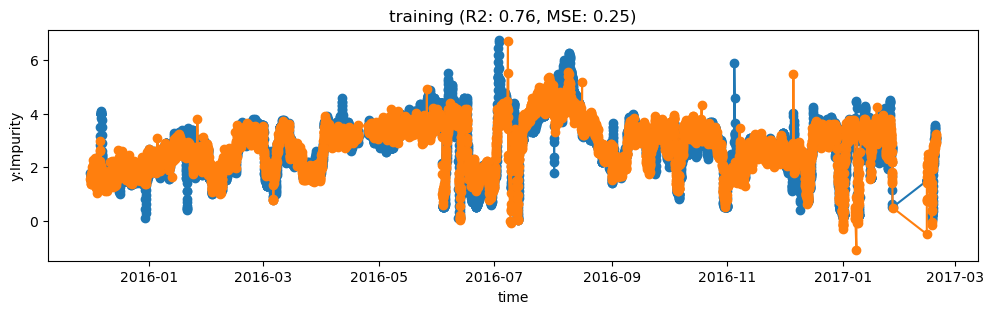

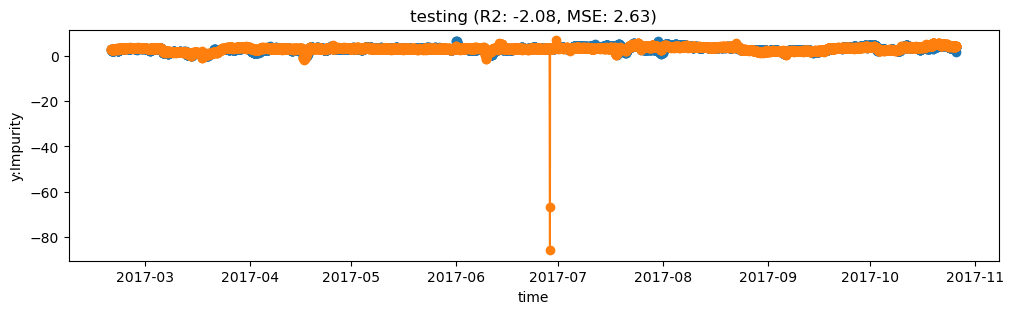

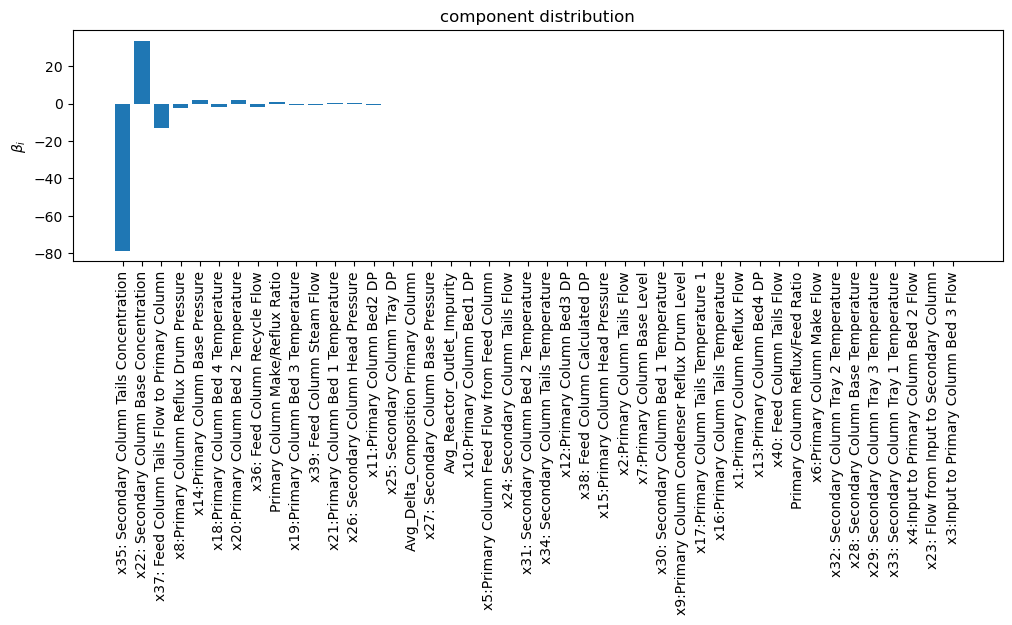

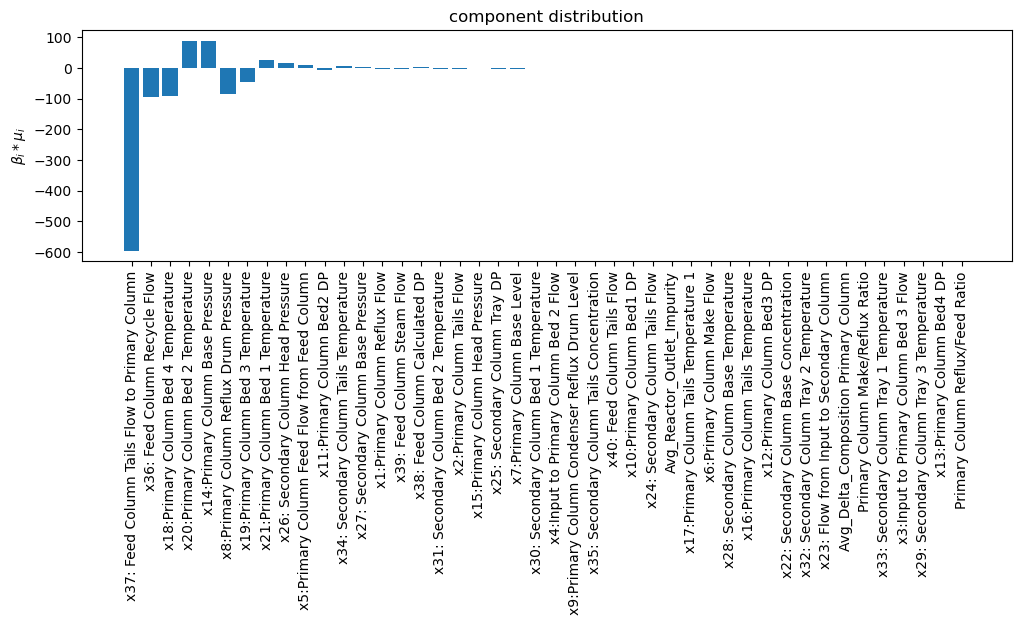

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lin = linear_model.LinearRegression() # call the constructor
lin.fit(train_X,train_Y) # train the model

# Plot training
plt.figure(figsize=(12,3))
plt.plot(train.iloc[:,0],train.iloc[:,-3],marker='o',label="data")
plt.plot(train.iloc[:,0],lin.predict(train_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(train.iloc[:,-3],lin.predict(train_X))
mse = mean_squared_error(train.iloc[:,-3],lin.predict(train_X))
plt.title("training (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))

# Plot validation
plt.figure(figsize=(12,3))
plt.plot(val.iloc[:,0],val.iloc[:,-3],marker='o',label="data")
plt.plot(val.iloc[:,0],lin.predict(val_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(val.iloc[:,-3],lin.predict(val_X))
mse = mean_squared_error(val.iloc[:,-3],lin.predict(val_X))
plt.title("testing (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))

# Plot component distribution
plt.figure(figsize=(12,3))
inds = np.argsort(abs(lin.coef_))[::-1]
plt.bar([ xcols[_] for _ in inds ],lin.coef_[inds])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i$")
plt.title("component distribution")
plt.show()

# Plot component distribution
plt.figure(figsize=(12,3))
vals = lin.coef_ * np.mean(train_X,axis=0)
inds = np.argsort(abs(vals))[::-1]
plt.bar([ xcols[_] for _ in inds ],vals[inds])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i*\mu_i$")
plt.title("component distribution")
plt.show()

Disaster in the validation set. Ordinary least squares overfits the training data. The model has extremely large coefficients associated with three variables. If any of these readings have a significant fluctation beyond those observed in the training data, the prediction will be catastrophically bad. 

#### Ridge Regression (L2 regularization)

best alpha: 10000.0


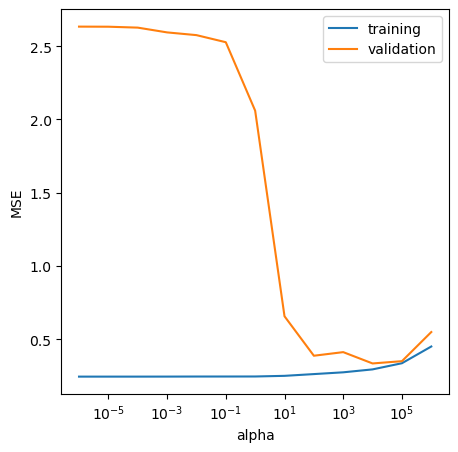

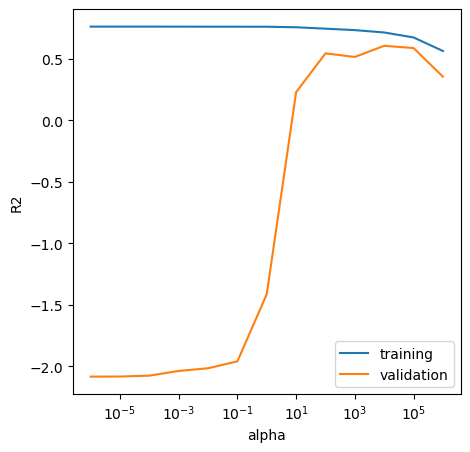

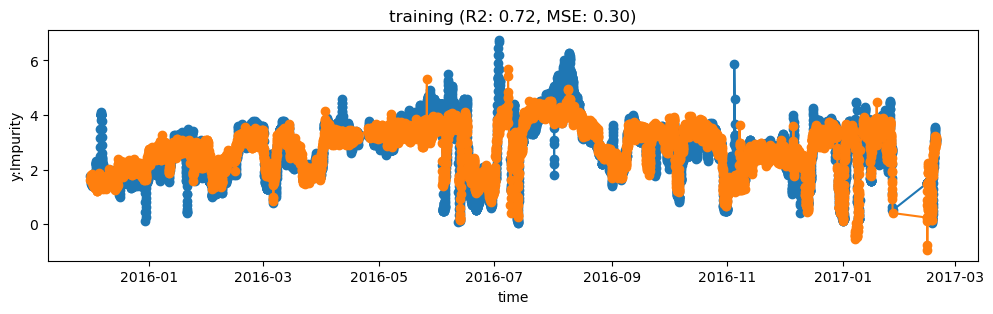

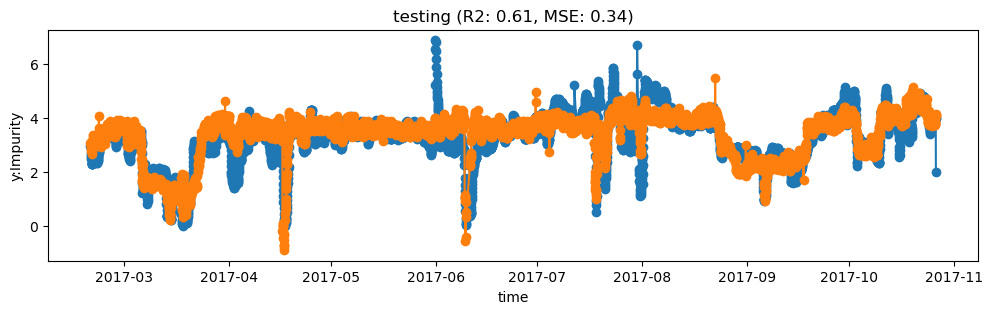

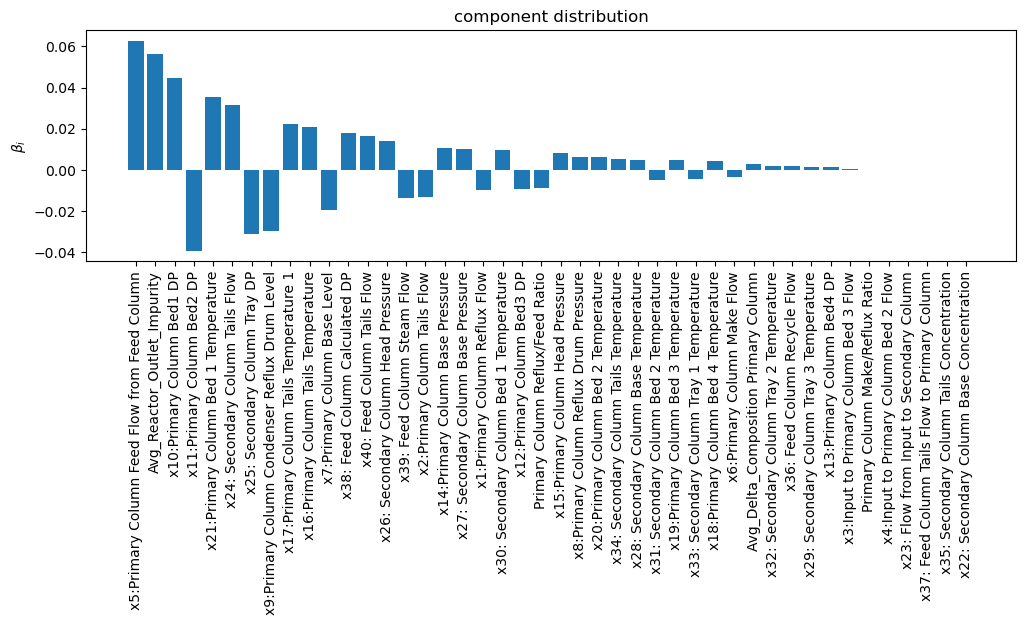

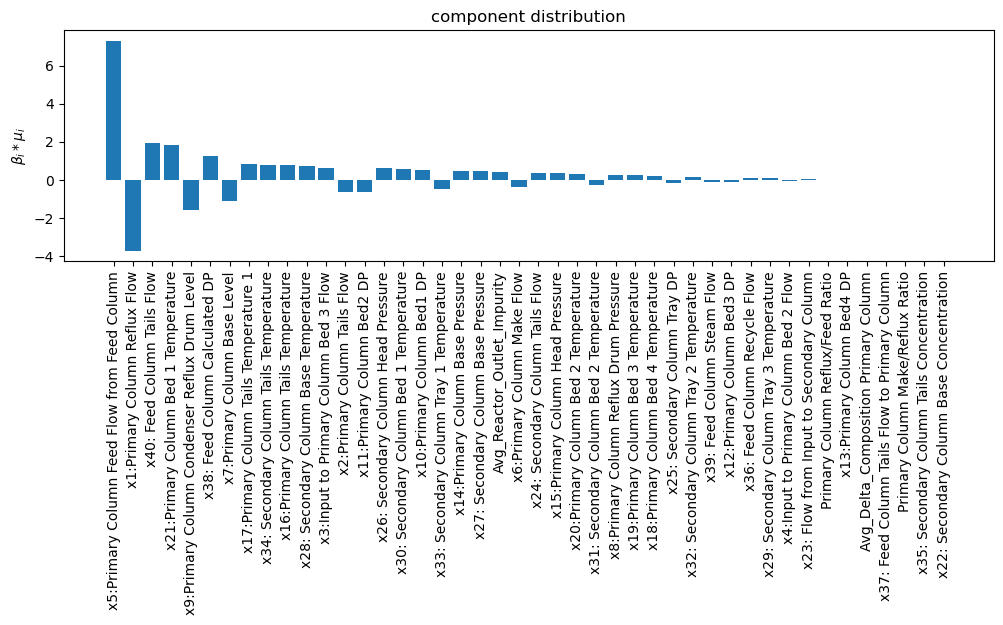

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### How you would do this with cross validation
#reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13),store_cv_values=True) # CV for ridge regularization parameter
#reg.fit(train_X,train_Y) # CV on alpha parameter
#print("cv mse: {}".format(np.mean(reg.cv_values_,axis=0)))
#print("best alpha: {}".format(reg.alpha_))
#lin = linear_model.Ridge(alpha=reg.alpha_) # call the constructor
#lin.fit(train_X,train_Y) # train the model

# Use validation data to select the best n_components hyperparameter
# Do a hyperparameter optimization on alpha
alphas = np.logspace(-6,2,20)
mse_train = []
mse_valid = []
r2_train  = []
r2_valid  = []
alphas = np.logspace(-6, 6, 13)
for i in alphas:
  lin = linear_model.Ridge(alpha=i) # call the constructor
  lin.fit(train_X,train_Y) # train the model
  mse_train += [mean_squared_error(train.iloc[:,-3],lin.predict(train_X))]
  mse_valid += [mean_squared_error(val.iloc[:,-3],lin.predict(val_X))]
  r2_train += [r2_score(train.iloc[:,-3],lin.predict(train_X))]
  r2_valid += [r2_score(val.iloc[:,-3],lin.predict(val_X))]

# Fit on best
print("best alpha: {}".format(alphas[np.argmin(mse_valid)]))
lin = linear_model.Ridge(alpha=alphas[np.argmin(mse_valid)])
lin.fit(train_X,train_Y)

# Plot learning curve for mse
plt.figure(figsize=(5,5))  
plt.plot(alphas,mse_train,label="training")
plt.plot(alphas,mse_valid,label="validation")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.xscale('log')
plt.legend()

# Plot learning curve for r2
plt.figure(figsize=(5,5))  
plt.plot(alphas,r2_train,label="training")
plt.plot(alphas,r2_valid,label="validation")
plt.xlabel("alpha")
plt.ylabel("R2")
plt.xscale('log')
plt.legend()

# Plot training
plt.figure(figsize=(12,3))
plt.plot(train.iloc[:,0],train.iloc[:,-3],marker='o',label="data")
plt.plot(train.iloc[:,0],lin.predict(train_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(train.iloc[:,-3],lin.predict(train_X))
mse = mean_squared_error(train.iloc[:,-3],lin.predict(train_X))
plt.title("training (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))

# Plot validation
plt.figure(figsize=(12,3))
plt.plot(val.iloc[:,0],val.iloc[:,-3],marker='o',label="data")
plt.plot(val.iloc[:,0],lin.predict(val_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(val.iloc[:,-3],lin.predict(val_X))
mse = mean_squared_error(val.iloc[:,-3],lin.predict(val_X))
plt.title("testing (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))

# Plot component distribution
plt.figure(figsize=(12,3))
inds = np.argsort(abs(lin.coef_))[::-1]
plt.bar([ xcols[_] for _ in inds ],lin.coef_[inds])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i$")
plt.title("component distribution")
plt.show()

# Plot component distribution
plt.figure(figsize=(12,3))
vals = lin.coef_ * np.mean(train_X,axis=0)
inds = np.argsort(abs(vals))[::-1]
plt.bar([ xcols[_] for _ in inds ],vals[inds])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i*\mu_i$")
plt.title("component distribution")
plt.show()

Regularization greatly improves the performance on the validation data. Model utilizes much smaller coefficients than least-squares (i.e., it is simpler and will be less sensitive to large fluctations in any particular single sensor reading)
#### Lasso Regression

/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+03, tolerance: 1.019e+01
  model = cd_fast.enet_coordinate_descent(
/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+03, tolerance: 1.019e+01
  model = cd_fast.enet_coordinate_descent(
/home/bernalde/miniconda3/envs/CHE597/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

best alpha: 0.09999999999999999


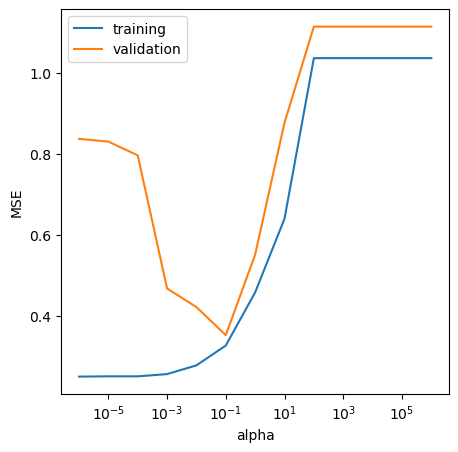

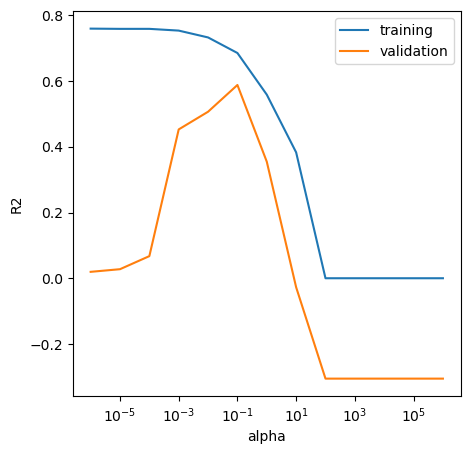

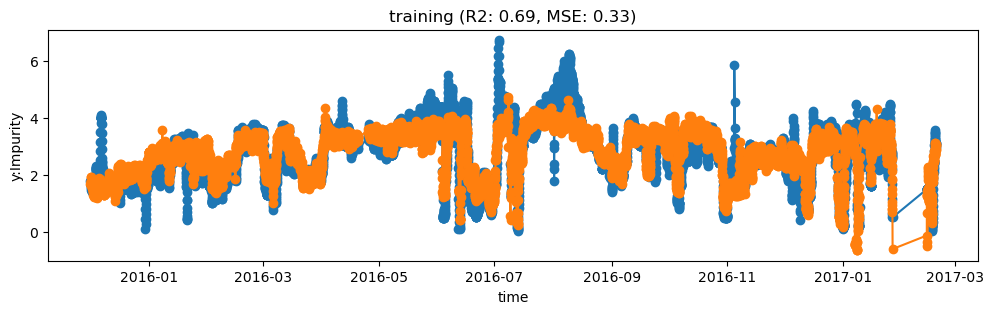

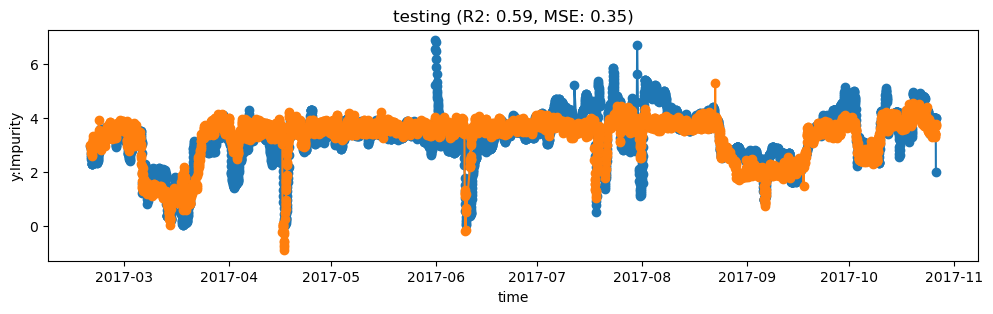

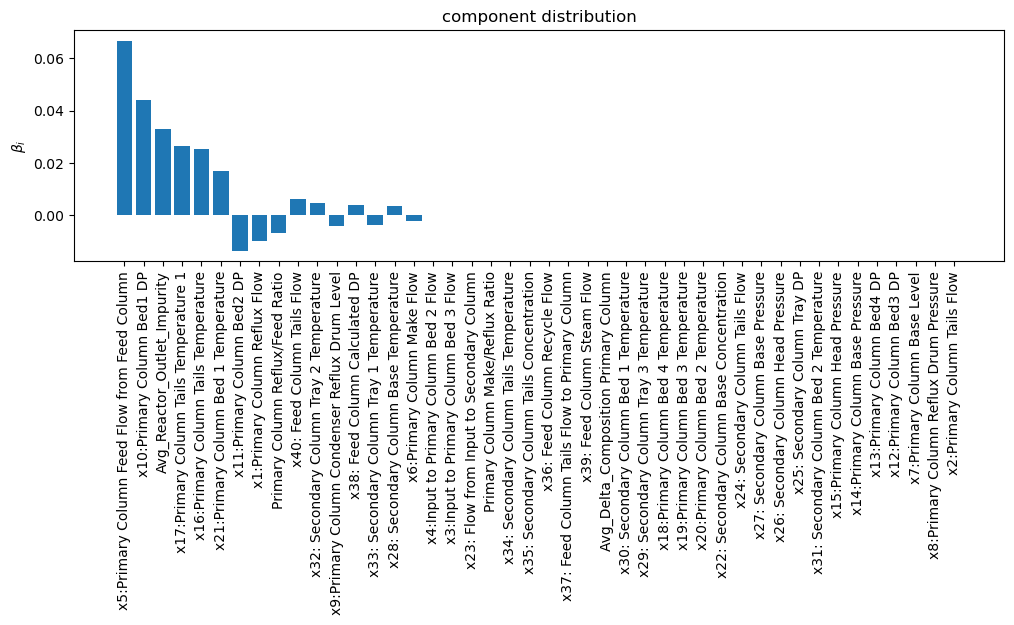

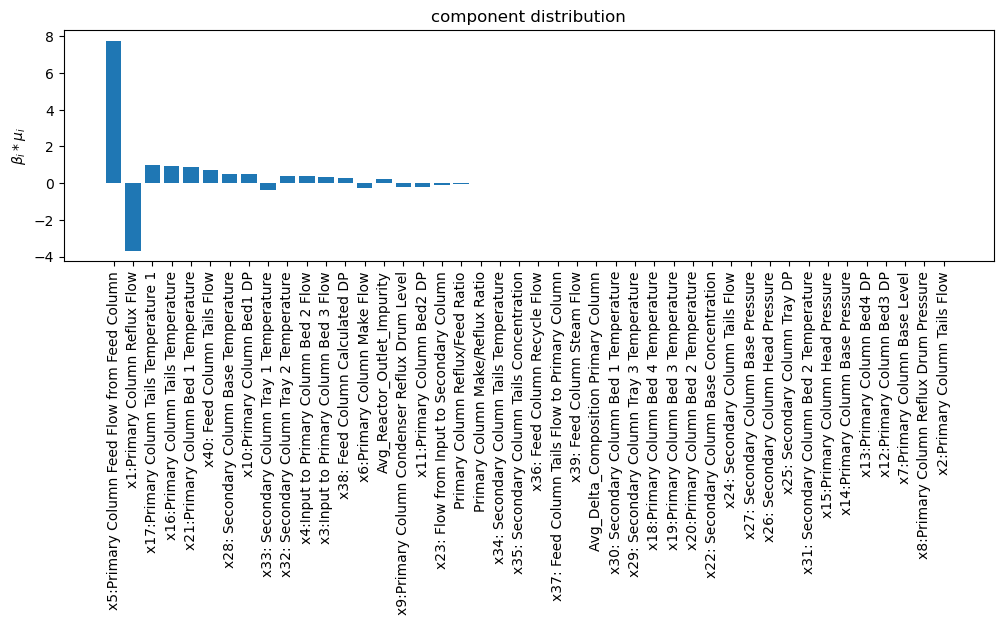

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### How you would do this with cross validation
#reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13),max_iter=100000) # CV for lasso regularization parameter
#reg.fit(train_X,train_Y) # CV on alpha parameter
#print("best alpha: {}".format(reg.alpha_))
#lin = linear_model.Lasso(alpha=reg.alpha_,max_iter=10000) # call the constructor
#lin.fit(train_X,train_Y) # train the model

# Use validation data to select the best n_components hyperparameter
# Do a hyperparameter optimization on alpha
alphas = np.logspace(-6,2,20)
mse_train = []
mse_valid = []
r2_train  = []
r2_valid  = []
alphas = np.logspace(-6, 6, 13)
for i in alphas:
  lin = linear_model.Lasso(alpha=i,max_iter=1000,tol=0.001) # call the constructor
  lin.fit(train_X,train_Y) # train the model
  mse_train += [mean_squared_error(train.iloc[:,-3],lin.predict(train_X))]
  mse_valid += [mean_squared_error(val.iloc[:,-3],lin.predict(val_X))]
  r2_train += [r2_score(train.iloc[:,-3],lin.predict(train_X))]
  r2_valid += [r2_score(val.iloc[:,-3],lin.predict(val_X))]

# Fit on best
print("best alpha: {}".format(alphas[np.argmin(mse_valid)]))
lin = linear_model.Lasso(alpha=alphas[np.argmin(mse_valid)],max_iter=1000)
lin.fit(train_X,train_Y)

# Plot learning curve for mse
plt.figure(figsize=(5,5))  
plt.plot(alphas,mse_train,label="training")
plt.plot(alphas,mse_valid,label="validation")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.xscale('log')
plt.legend()

# Plot learning curve for r2
plt.figure(figsize=(5,5))  
plt.plot(alphas,r2_train,label="training")
plt.plot(alphas,r2_valid,label="validation")
plt.xlabel("alpha")
plt.ylabel("R2")
plt.xscale('log')
plt.legend()

# Plot training
plt.figure(figsize=(12,3))
plt.plot(train.iloc[:,0],train.iloc[:,-3],marker='o',label="data")
plt.plot(train.iloc[:,0],lin.predict(train_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(train.iloc[:,-3],lin.predict(train_X))
mse = mean_squared_error(train.iloc[:,-3],lin.predict(train_X))
plt.title("training (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))
#plt.ylim([0,6])

# Plot validation
plt.figure(figsize=(12,3))
plt.plot(val.iloc[:,0],val.iloc[:,-3],marker='o',label="data")
plt.plot(val.iloc[:,0],lin.predict(val_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(val.iloc[:,-3],lin.predict(val_X))
mse = mean_squared_error(val.iloc[:,-3],lin.predict(val_X))
plt.title("testing (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))
#plt.ylim([0,6])

# Plot component distribution
plt.figure(figsize=(12,3))
inds = np.argsort(abs(lin.coef_))[::-1]
plt.bar([ xcols[_] for _ in inds ],lin.coef_[inds])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i$")
plt.title("component distribution")
plt.show()

# Plot component distribution
plt.figure(figsize=(12,3))
vals = lin.coef_ * np.mean(train_X,axis=0)
inds = np.argsort(abs(vals))[::-1]
plt.bar([ xcols[_] for _ in inds ],vals[inds])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i*\mu_i$")
plt.title("component distribution")
plt.show()

Lasso regularization also greatly improves the performance on the validation data relative to ordinary least-squares. The model utilizes less variables than ridge (as expected). 

You should thinking carefully about when you would use ridge vs lasso (as well as any other regularization technique). In the case of redundant sensor data, it is sometimes bad to bias your model towards fewer variables, because you can lose the redundancy protection provided by multiple sensors. In this case, Lasso is slightly less effective than Ridge, whereas in the artificial dataset we discussed earlier in the noteboook, Lasso was better at approximating the  generating function. 

#### Partial Least Squares

best n: 7
best n: 7


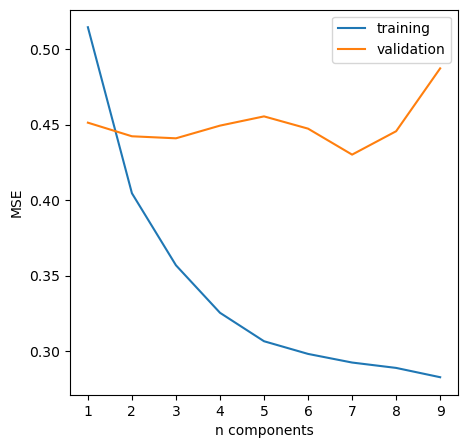

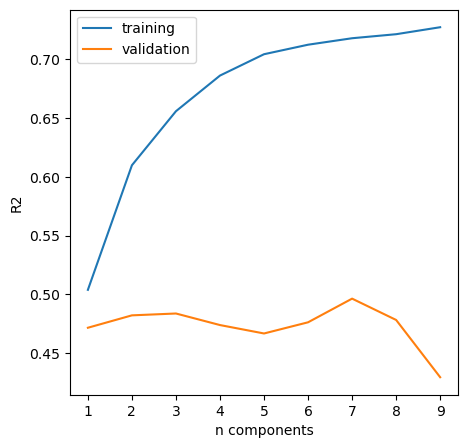

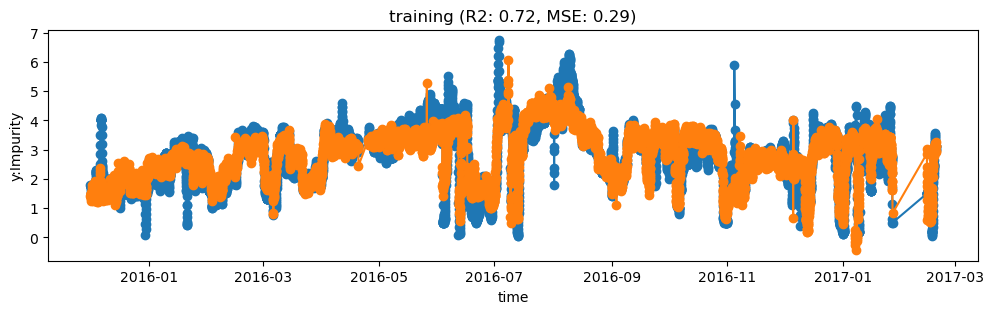

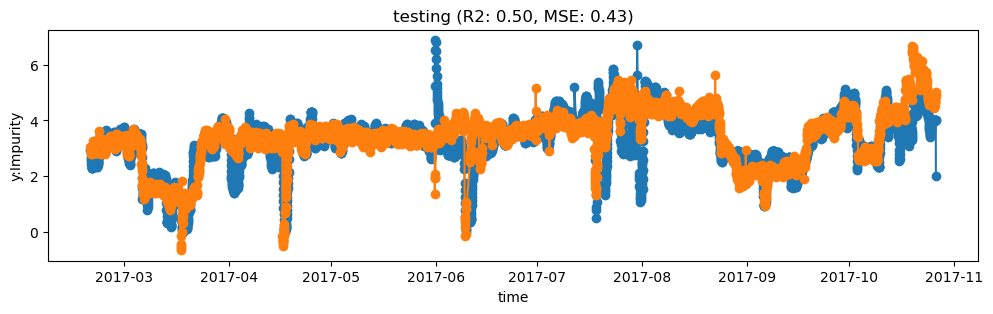

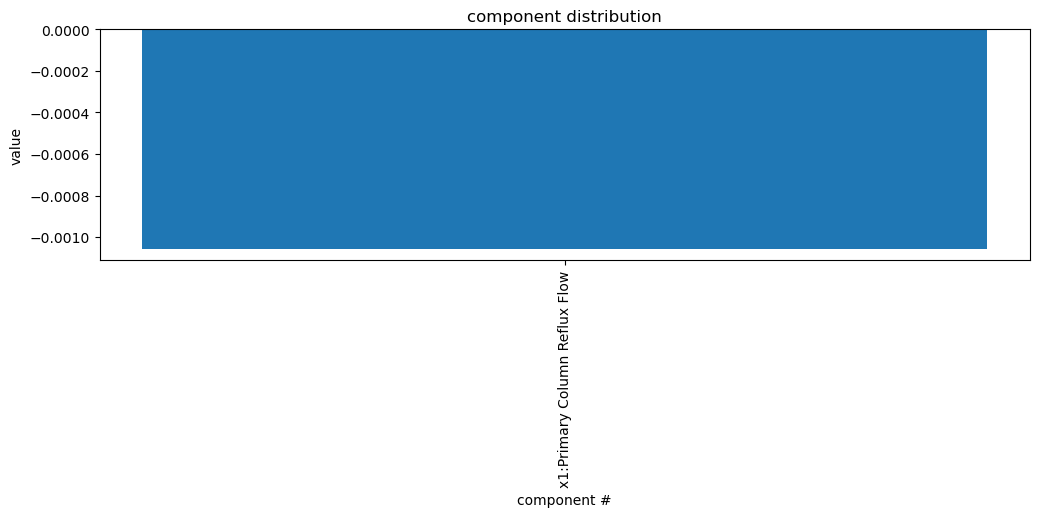

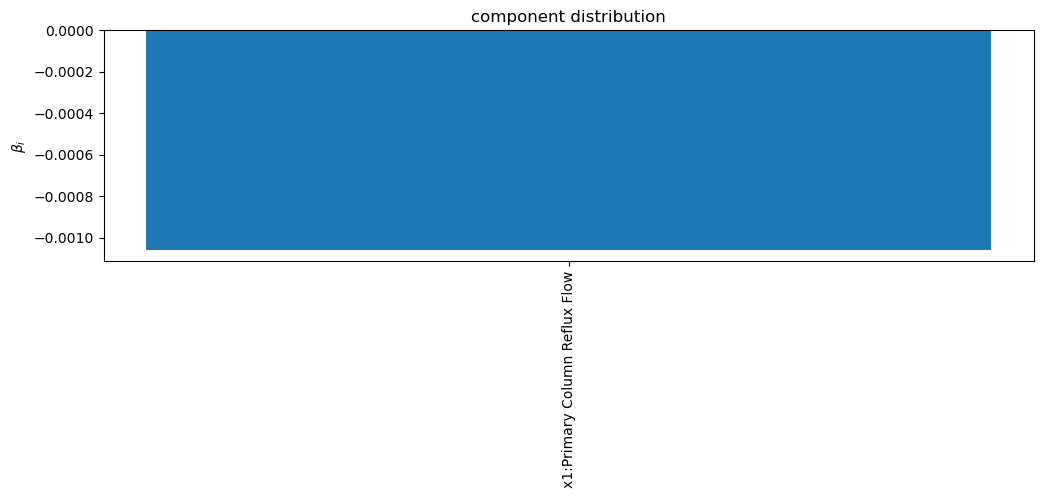

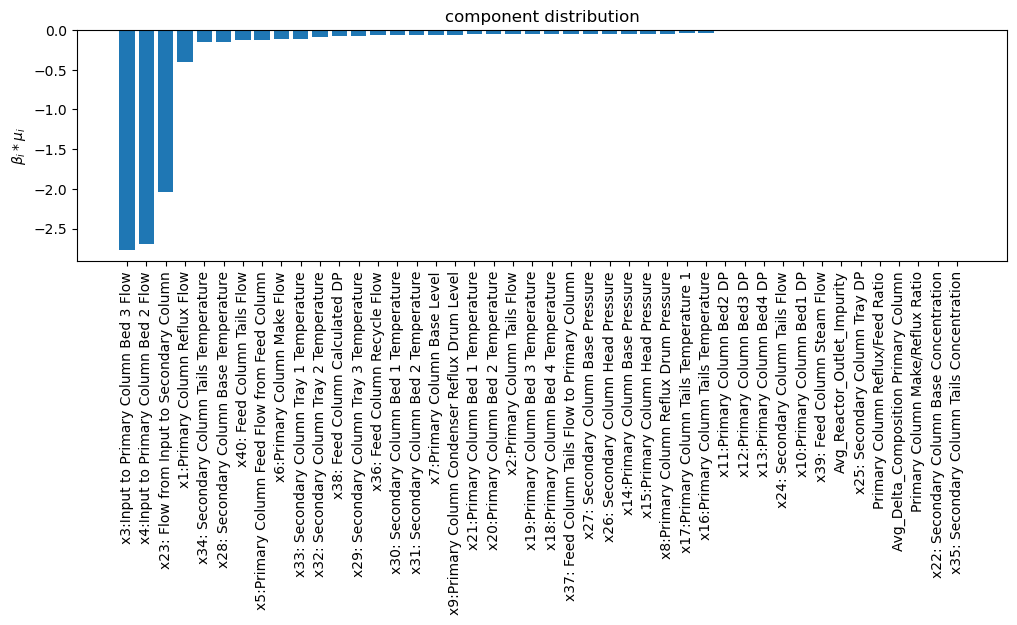

In [20]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use validation data to select the best n_components hyperparameter
mse_train = []
mse_valid = []
r2_train  = []
r2_valid  = []
n_comp = range(1,10)
for i in n_comp:
  lin = PLSRegression(n_components=i) # call the constructor
  lin.fit(train_X,train_Y) # train the model
  mse_train += [mean_squared_error(train.iloc[:,-3],lin.predict(train_X))]
  mse_valid += [mean_squared_error(val.iloc[:,-3],lin.predict(val_X))]
  r2_train += [r2_score(train.iloc[:,-3],lin.predict(train_X))]
  r2_valid += [r2_score(val.iloc[:,-3],lin.predict(val_X))]

# Train on the best n_components
n_best = n_comp[np.argmin(mse_valid)]
print("best n: {}".format(n_best))
lin = PLSRegression(n_components=n_best) # call the constructor
lin.fit(train_X,train_Y) # train the model

# Plot learning curve for mse
plt.figure(figsize=(5,5))  
plt.plot(n_comp,mse_train,label="training")
plt.plot(n_comp,mse_valid,label="validation")
plt.xlabel("n components")
plt.ylabel("MSE")
plt.legend()

# Plot learning curve for r2
plt.figure(figsize=(5,5))  
plt.plot(n_comp,r2_train,label="training")
plt.plot(n_comp,r2_valid,label="validation")
plt.xlabel("n components")
plt.ylabel("R2")
plt.legend()

# Train on the best n_components
n_best = n_comp[np.argmin(mse_valid)]
print("best n: {}".format(n_best))
lin = PLSRegression(n_components=n_best) # call the constructor
lin.fit(train_X,train_Y) # train the model

# Plot training
plt.figure(figsize=(12,3))  
plt.plot(train.iloc[:,0],train.iloc[:,-3],marker='o',label="data")
plt.plot(train.iloc[:,0],lin.predict(train_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(train.iloc[:,-3],lin.predict(train_X))
mse = mean_squared_error(train.iloc[:,-3],lin.predict(train_X))
plt.title("training (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))

# Plot validation
plt.figure(figsize=(12,3))
plt.plot(val.iloc[:,0],val.iloc[:,-3],marker='o',label="data")
plt.plot(val.iloc[:,0],lin.predict(val_X),marker='o',label="pred")
plt.xlabel("time")
plt.ylabel("y:Impurity")
r2 = r2_score(val.iloc[:,-3],lin.predict(val_X))
mse = mean_squared_error(val.iloc[:,-3],lin.predict(val_X))
plt.title("testing (R2: {:<4.2f}, MSE: {:<4.2f})".format(r2,mse))

# Plot component distribution
plt.figure(figsize=(12,3))
inds = np.argsort(lin.coef_[:,0])
plt.bar([ xcols[_] for _ in inds ],lin.coef_[inds,0])
plt.xlabel("component #")
plt.xticks(rotation=90)
plt.ylabel("value")
plt.title("component distribution")
plt.show()

# Plot component distribution
plt.figure(figsize=(12,3))
inds = np.argsort(abs(lin.coef_[:,0]))[::-1]
plt.bar([ xcols[_] for _ in inds ],lin.coef_[inds,0])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i$")
plt.title("component distribution")
plt.show()

# Plot component distribution
plt.figure(figsize=(12,3))
vals = lin.coef_[:,0] * np.mean(train_X,axis=0)
inds = np.argsort(abs(vals))[::-1]
plt.bar([ xcols[_] for _ in inds ],vals[inds])
plt.xticks(rotation=90)
plt.ylabel(r"$\beta_i*\mu_i$")
plt.title("component distribution")
plt.show()

PLS manages to avoids the large coefficients of ordinary least squares. The optimal performance is obtained with 7 components, but the learning curve is relatively flat, and similar performance can be obtained with significantly less (e.g., experiment with `n_components=2,5,10,20`). In comparison with ridge and lasso, PLS shows overall inferior performance but identifies several of the same variables to be important. 